<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0711_43%EC%9D%BC%EC%B0%A8_AI(%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90%5B%EC%A0%84%EC%B2%98%EB%A6%AC(str_%3E%EC%88%AB%EC%9E%90)%2C_%ED%91%9C%EB%A1%9C_%EB%82%98%ED%83%80%EB%82%B4%EA%B8%B0%5D_%EC%A0%95%ED%99%95%EB%8F%84_%EC%98%88%EC%B8%A1%5BDecisionTreeClassifier%2C_RandomForestClassifier%2C_StratifiedKFold%2C_cross_val_score%5D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
titanic_df = pd.read_csv('titanic_train.csv')

PassengerId: 탑승자 데이터 일련번호

Survived: 생존여부, 0 = 사망, 1 = 생존

Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석

Sex: 탑승자 성별

Name: 탑승자 이름

Age: 탑승자 나이

SibSp: 같이 탑승한 형제, 자매 또는 배우자 인원 수

Parch: 같이 탑승한 부모님 또는 자녀 인원 수

Ticket: 티켓 번호

Fare: 요금

Cabin: 선실 번호

Embarked: 탑승 항구, C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
titanic_df.Age=titanic_df.Age.fillna(titanic_df.Age.mean())
titanic_df.Cabin=titanic_df.Cabin.fillna('N')
titanic_df.Embarked=titanic_df.Embarked.fillna('N')

In [ ]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
 titanic_df['Cabin'] = titanic_df.Cabin.str[:1]

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [ ]:
import seaborn as sns

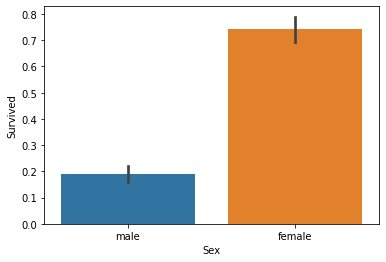

In [ ]:
sns.barplot(x='Sex', y='Survived', data = titanic_df)

In [ ]:
titanic_df.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   81     81     81      81    81   
       1                 233     233   233  233    233    233     233   233   
male   0                 468     468   468  468    468    468     468   468   
       1                 109     109   109  109    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0            81        81  
       1           233       233  
male   0           468       468  
       1           109       109

In [ ]:
titanic_df.groupby(['Sex', 'Survived']).size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


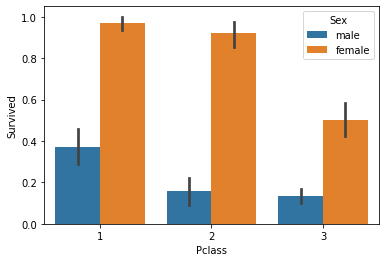

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [ ]:
def get_category(age):
    cat=''
    if age <= -1 : cat = 'Unknown'
    elif age <=5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <=18: cat = 'Teenager'
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

In [ ]:
get_category(21)

'Student'

In [ ]:
f = lambda x: get_category(x)

In [ ]:
f(45)

'Adult'

In [ ]:
list(map(f, [21, 45,62]))

['Student', 'Adult', 'Elderly']

In [ ]:
list(map(lambda x: get_category(x), [21, 45, 67]))

['Student', 'Adult', 'Elderly']

In [ ]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

In [ ]:
#titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category)

In [ ]:
titanic_df.head()

In [ ]:
group_name=['Unknown', 'Baby', 'Child', 'Teenager', 'Student','Young Adult', 'Adult', 'Elderly']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


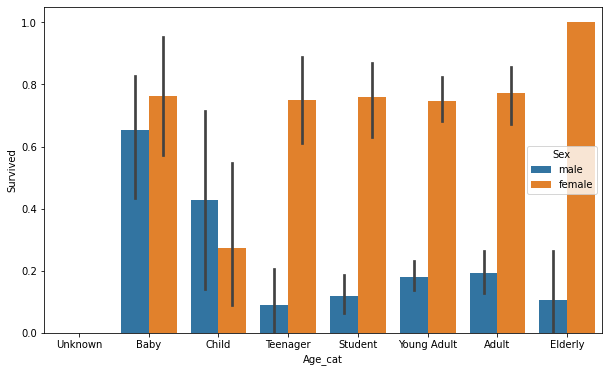

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot('Age_cat', 'Survived', hue='Sex', data=titanic_df, order=group_name)

In [ ]:
titanic_df.drop(['PassengerId','Name','Ticket','Age_cat'], axis=1, inplace=True)

In [ ]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,N,S
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,N,S
3,1,1,female,35.000000,1,0,53.1000,C,S
4,0,3,male,35.000000,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,N,S
887,1,1,female,19.000000,0,0,30.0000,B,S
888,0,3,female,29.699118,1,2,23.4500,N,S
889,1,1,male,26.000000,0,0,30.0000,C,C


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

In [ ]:
import numpy as np

a_train = np.array(['pc','mobile','pc','desk'])
a_test = np.array(['pc','tablet','mobile'])
#a_test = np.array(['pc','pc','mobile','pc','desk','desk'])

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoder.fit(a_train)

LabelEncoder()

In [ ]:
a_train_encoded = encoder.transform(a_train)

In [ ]:
a_train_encoded

array([2, 1, 2, 0])

In [ ]:
encoder.classes_

array(['desk', 'mobile', 'pc'], dtype='<U6')

In [ ]:
titanic_df=encode_features(titanic_df)

In [ ]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [ ]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

In [ ]:
y_titanic_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [ ]:
from sklearn.model_selection import train_test_split
#모델 생성
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier()   #인스턴스 생성
dt_clf.fit(X_train, y_train)    #fit
dt_pred = dt_clf.predict(X_test)    #예측
print('DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도 :0.7598


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도 :0.7989


dt_clf 100개를 사용 => 각각 확률 산출 => 이값들을 평균 => 확률 산출 => 분류

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 :{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도 :0.7598


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score #과제

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()
x_data = boston.data
y_data = boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
x_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
y_data

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [ ]:
score = r2_score(y_test, pred)

In [ ]:
score

0.6571693746718297

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris= load_iris()

In [ ]:
train_data = iris.data
train_label = iris.target

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_data, train_label)
dt_pred = dt_clf.predict(train_data)
print('DecisionTreeClassifier 정확도 :{0:.4f}'.format(accuracy_score(train_label, dt_pred)))

DecisionTreeClassifier 정확도 :1.0000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1234, stratify=iris.)

In [ ]:
dt_clf_2 = DecisionTreeClassifier()
dt_clf_2.fit(X_train, y_train)
pred = dt_clf_2.predict(X_test)
score = accuracy_score(y_test, pred)
print(score)

0.9555555555555556


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
features = iris.data
label = iris.target

In [ ]:
kfold = KFold(n_splits=5)

In [ ]:
for hun_index, si_index in kfold.split(features):
    print('훈련 인덱스 :', hun_index)
    print('시험 인덱스 :', si_index )
    print()

훈련 인덱스 : [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
시험 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

훈련 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 1

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [ ]:
cv_accuracy=[]

In [ ]:
n_iter =0
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter +=1
    accuracy = np.round(accuracy_score(y_test, pred), 4)

    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
            .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도 : 0.9


#Stratified K-Fold

label의 분포를 고려하여 분할한다.

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
kfold = KFold(n_splits=3)

In [ ]:
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train= iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print('==============')

##교차 검증 : 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
##교차 검증 : 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
##교차 검증 : 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df.iloc[:, :4], iris_df(['label']):
    n_iter +=1
    label_train= iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print('==============')

SyntaxError: ignored

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [ ]:
skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    #반복시 마다 정확도 측정
    n_iter +=1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
            .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
print('\n## 교차 검증별 정확도 :', np.round(cv_accuracy, 4))
print('##평균 검증 정확도 :', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.98 0.94 0.98]
##평균 검증 정확도 : 0.9666666666666667


#cross_val_score()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data= iris_data.data
label = iris_data.target

#성능지표는 정확도 (accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data,label, scoring='accuracy', cv=3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores),4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667
